<a href="https://colab.research.google.com/github/armenh1991/Sales_Analysis/blob/main/Sales%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Analysis**

### Import Statements


In [70]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Read CVS files and merge them into 1 dataframe


In [ ]:
dir = './'

all_data = pd.DataFrame()

for file in os.listdir(dir):
  if file.endswith(".csv"):
    df = pd.read_csv(''+file)
    all_data = pd.concat([all_data, df])

all_data.head()

    


# Cleaning Data

**Converting STR to INT**

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

**Drop rows of** **NAN**

In [54]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')

**Find 'Or' and remove it**

In [57]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


**Adding Total and Month columns**

In [ ]:
all_data['Total'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data



In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data

**Adding City Column**

In [159]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,16
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,08
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,12
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,10
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,02
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,06
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10


**Adding An Hour Column**

In [158]:
all_data['Hour'] = all_data['Order Date'].apply(lambda x: x.split(' ')[1].split(':')[0])

# **- What was the best month for sales? How much was earned that month?**

In [ ]:
results = all_data.groupby('Month').sum()
results

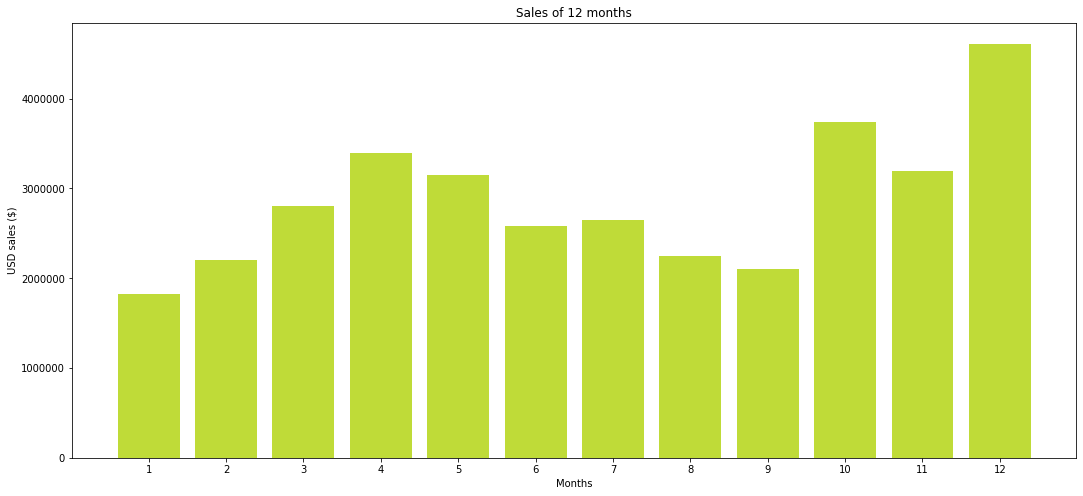

In [125]:
months = range(1,13)
plt.figure(figsize=(18, 8))
plt.title('Sales of 12 months')
plt.xlabel('Months')
plt.ylabel('USD sales ($)')
plt.xticks(months)
plt.ticklabel_format(style='plain')

plt.bar(months, results['Total'], color='#BFDB38')
plt.show()

# **- What city sold the most product?**

In [ ]:
city_results = all_data.groupby(['City']).sum()
city_results

<BarContainer object of 9 artists>

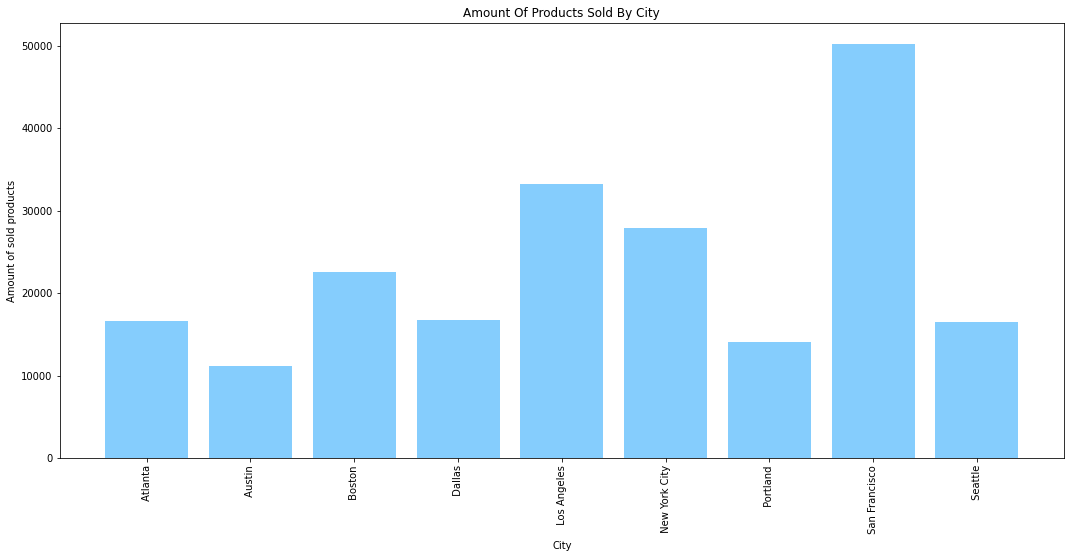

In [124]:
plt.figure(figsize=(18, 8))
plt.title('Amount Of Products Sold By City')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Amount of sold products')


plt.bar(city_results.index, city_results['Quantity Ordered'], color='#85CDFD')

# **- What time should we display advertisemens to maximize the likelihood of customer’s buying product?**

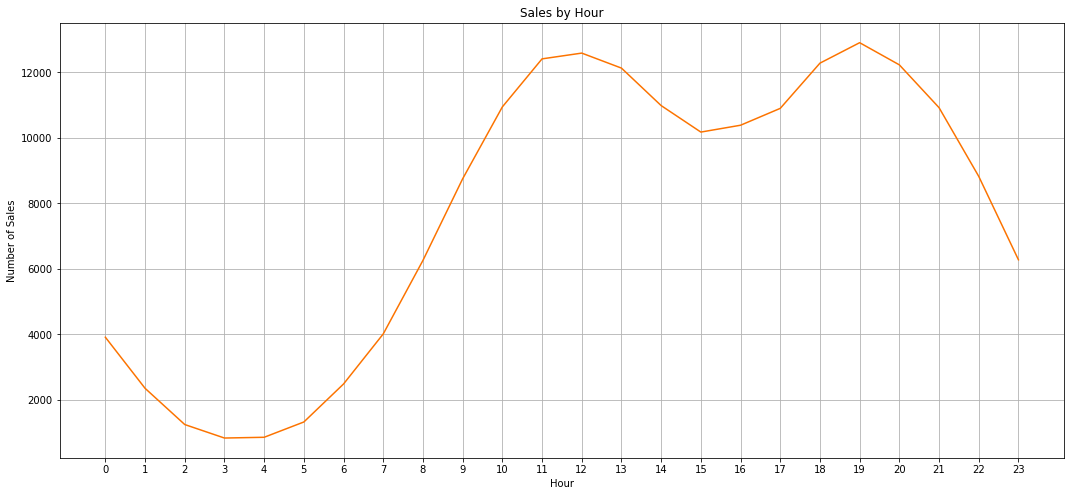

In [168]:
plt.figure(figsize=(18, 8))
plt.title('Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
hour = range(00,24)
plt.xticks(hour)
plt.grid()

plt.plot(hour, all_data.groupby('Hour').count()['Order ID'], color='#FC7300')
plt.show()

In [ ]:
all_data.groupby('Hour').count()['Order ID']

# **- What products are most often sold together?**

In [ ]:
same_customer_df = all_data[all_data['Order ID'].duplicated(keep=False)]

top_grouped_sold_items = same_customer_df.groupby('Product').sum().sort_values(by=['Quantity Ordered'], ascending=False).head(7)

top_grouped_sold_items['Quantity Ordered']

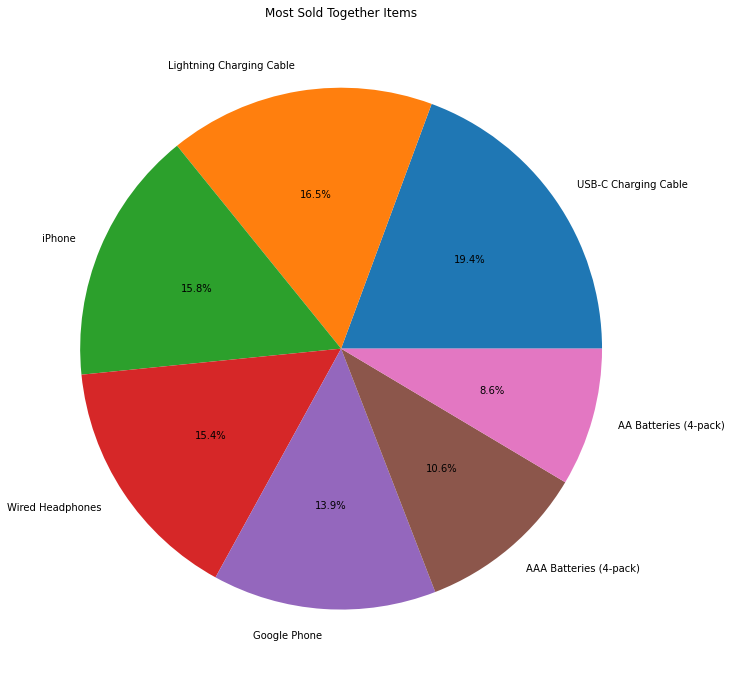

In [210]:
plt.figure(figsize=(18, 12))
plt.title('Most Sold Together Items')


plt.pie(top_grouped_sold_items['Quantity Ordered'], labels=top_grouped_sold_items.index, autopct='%1.1f%%')

plt.show()

# **- What product sold the most? Why do you think it sold the most?**

In [216]:
top_sold_items = all_data.groupby('Product').sum().sort_values(by=['Quantity Ordered'], ascending=False).head(5)

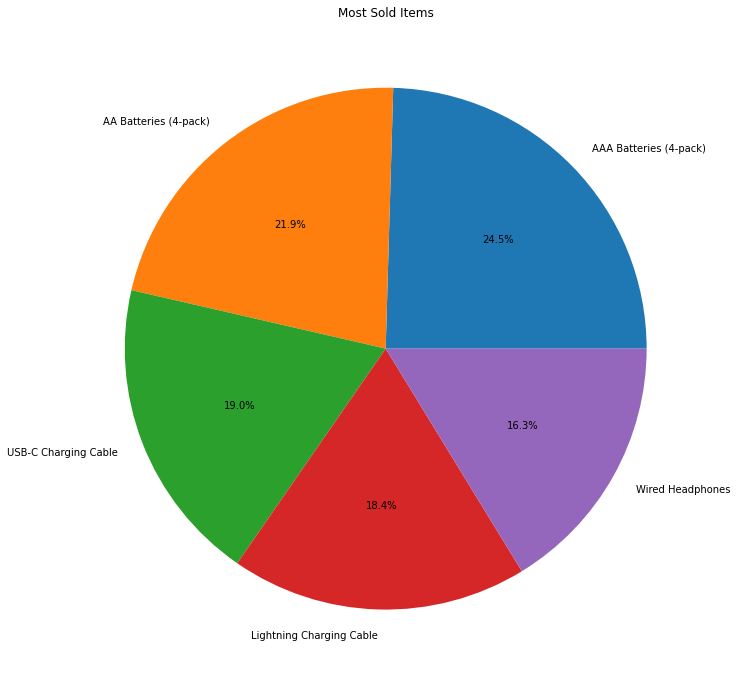

In [224]:
plt.figure(figsize=(18, 12))
plt.title('Most Sold Items')



plt.pie(top_sold_items['Quantity Ordered'], labels=top_sold_items.index, autopct='%1.1f%%')
plt.show()

In [225]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,16
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,08
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,12
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,10
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,02
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,06
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10
